# Fourier Properties
Notes: Audio Signal Processing, Coursera Class, Week 3

Date: 20170414


## Linearity
* A well behaved opration.

$a x_1[n] + b x_2[n] \Leftrightarrow a X_1[k] + b X_2[k]$

$\begin{align}
DFT(& a x_1[n] + b x_2[n])\\
= & \sum\limits_{n=0}^{N-1} {(a x_1[n] + b x_2[n])e^{-j 2 \pi k n / N}}\\
= & a \sum\limits_{n=0}^{N-1} {x_1[n]e^{-j 2 \pi k n / N}} + b \sum\limits_{n=0}^{N-1} {x_2[n]e^{-j 2 \pi k n / N}}\\
= & a X_1[k] + b X_2[k]
\end{align}$



## Shift

* Displacing samples of a signal.
* or... shifting the signal by a certain number of samples.

$x[n-n_0] \Leftrightarrow e^{-j 2 \pi k n_0 / N} X[k]$

## Symmetry

$\begin{align}
x[n] \, real &\Leftrightarrow \mathbb{R}{X[k]} \, even \quad &&and \quad \mathbb{I}{X[k]} \, odd\\
&\Leftrightarrow |X[k]| \,even \quad &&and \quad <X[k] \, odd\\
x[n] \, real \, and \, even &\Leftrightarrow \mathbb{R}{X[k]} \, even \quad &&and \quad \mathbb{I}{X[k]} =0\\
&\Leftrightarrow |X[k]| \, even \quad &&and \quad <X[k] =n\pi\\
\end{align}$

# Convolution

$x_1[n] * x_2[n] \Leftrightarrow X_1[k] \times X_2[k]$

## Energy Conservation and dB
* Energy of a signal in the time or frequency domain can be calculated in the same way, the solution is the same.
* A more intuitive signal may be visualized by using dB

$\sum\limits_{n=-N/2}^{N/2-1}{|x[n]|^2} = \frac{1}{N} \sum\limits_{k=-N/2}^{N/2-1} {|X[k]|^2}$

Amplitude $=abs(X)=20 \log_{10}(abs(X))$

## Phase Unwrapping
* A way of representing the phase that is easier to understand.
* smooths out the phase by adding $2\pi$ whenever there is a discontinuity

## Zero Padding
* Adding zeros to the end of the signal
* smooths out the visualization
* zero padding in the time domain corresponds to interpolation in the frequency domain

## Fast Fourier Transform (FFT)
* An efficient implementation of the DFT equation by taking advantage of symmetries.  
* Restricts the signals to N being a power of 2.
* DFT grows quadratically, $N^2$ with size while FFT compute time grows $N\log N$

## FFT and Zero-Phase Windowing
* To use an FFT we want an input signal with a power of 2 length
* To do this, use zero padding and then zero-phase windowing
* zero-phase windowing takes the right side of the signal and moves it to the left side, inversely with the left, and adds the zeros in the middle.

## Analysis/Synthesis
1. Start from a signal
1. Compute the FFT, showing only half
1. Computing IFFT should be the same as the original

# Demonstration Lectures
## Periodic Signals
* A sawtooth signal has a complex spectrum.  It has a fundamental frequency, but also contains many other frequencies.

## Complex Sounds
* Looking at a speech sample
* The constanent at the begining of a word (attack) is aperiodic while the vowel is periodic.
* The cello-double.wav is a polyphonic sound.  Hard to see periodicity because two sounds are playing at the same time.  Some periodic occilation occurs when the two sounds reinforce each other.
* An orchestra sample would look random.  Some peaks are visible in the spectrum.

## Spectrum
* Sample size does not need to match FFT window size.
* FFT size defines how smooth the results are.
* First peak is the fundamental frequency and the rest are multiples of the fundamental.

# Programming Lectures
* note, triang example is not a power of 2, the FFT implements standard DFT when this is the case.
* Triangle needs to be centered at 0 to return a phase of 0

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
from scipy.signal import triang
from scipy.fftpack import fft

%matplotlib inline

In [2]:
cd C:\work\sigproc\asp\workspace

C:\work\sigproc\asp\workspace


(-3.141592653589793, 3.141592653589793)

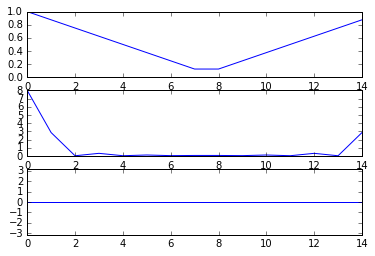

In [3]:
x = triang(15)
fftbuffer = sp.zeros(15)
fftbuffer[:8] = x[7:]
fftbuffer[8:] = x[:7]
X = fft(fftbuffer)
mX = abs(X)    # Magnitude
pX = sp.angle(X)    # Phase

plt.subplot(311)
plt.plot(fftbuffer)
plt.ylim([0, 1])
plt.subplot(312)
plt.plot(mX)
plt.subplot(313)
plt.plot(pX)
plt.ylim([-sp.pi, sp.pi])


In [4]:
'''import sys, os, math
sys.path.append('../software/models/')
#sys.path.append(os.path.join(os.path.dirname(os.realpath(__file__)), '../software/models/'))
import utilFunctions as UF                 # Unable to run on python 3.0


M = 501
hM1 = int(math.floor((M+1)/2))
hM2 = int(math.floor(M/2))

(fs, x) = UF.wavread('../sounds/soprano-E4.wav')
x1 = x[5000:5000+M] * sp.hamming(M)                   # Selects a selection of the imported file and windows
                                                      # it using the hamming window

N = 5111       # FFT, can be independent of M.  Select a power of 2 to use FFT algorithm, ie 1024.

# Split the signal and add the zero padding in the middle. 
fftbuffer = sp.zeros(N)
fftbuffer[:hM1] = x1[hM2:]
fftbuffer[N-hM2:] = x1[:hM2]   

X = fft(fftbuffer)
mX = 20*sp.log10(abs(X))
pX = sp.unwrap(sp.angle(X))

plt.subplot(312)
plt.plot(mX[0:512])  # Plot half the spectrum
plt.subplot(313)
plt.plot(pX)
'''

"import sys, os, math\nsys.path.append('../software/models/')\n#sys.path.append(os.path.join(os.path.dirname(os.realpath(__file__)), '../software/models/'))\nimport utilFunctions as UF                 # Unable to run on python 3.0\n\n\nM = 501\nhM1 = int(math.floor((M+1)/2))\nhM2 = int(math.floor(M/2))\n\n(fs, x) = UF.wavread('../sounds/soprano-E4.wav')\nx1 = x[5000:5000+M] * sp.hamming(M)                   # Selects a selection of the imported file and windows\n                                                      # it using the hamming window\n\nN = 5111       # FFT, can be independent of M.  Select a power of 2 to use FFT algorithm, ie 1024.\n\n# Split the signal and add the zero padding in the middle. \nfftbuffer = sp.zeros(N)\nfftbuffer[:hM1] = x1[hM2:]\nfftbuffer[N-hM2:] = x1[:hM2]   \n\nX = fft(fftbuffer)\nmX = 20*sp.log10(abs(X))\npX = sp.unwrap(sp.angle(X))\n\nplt.subplot(312)\nplt.plot(mX[0:512])  # Plot half the spectrum\nplt.subplot(313)\nplt.plot(pX)\n"

## dftModel

* the dftSynthesis has to recompute the negative frequencies from the positive ones.
* in models interface directory, check out the dftModel_function.py

In [5]:
'''import sys, os, math
from scipy.signal import get_window

(fs, x) = UF.wavread('../sounds/soprano-E4.wav')

M = 511
w = get_window('hamming', M)

time = 0.2
x1 = x[int(time*fs):int(time*fs)+M]

N = 1024
mX, pX = DFT.dftAnal(x1, w, N)

y = DFT.dftSynth(mX, pX, w.size)*sum(w)'''

"import sys, os, math\nfrom scipy.signal import get_window\n\n(fs, x) = UF.wavread('../sounds/soprano-E4.wav')\n\nM = 511\nw = get_window('hamming', M)\n\ntime = 0.2\nx1 = x[int(time*fs):int(time*fs)+M]\n\nN = 1024\nmX, pX = DFT.dftAnal(x1, w, N)\n\ny = DFT.dftSynth(mX, pX, w.size)*sum(w)"

In [6]:
cd A3

C:\work\sigproc\asp\workspace\A3


4800

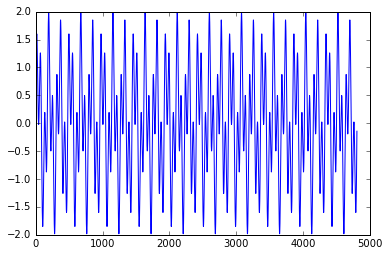

In [7]:
from math import gcd

f1 = 300
f2 = 800

A = 1
phi = 0
fs = 48000
t = sp.arange(0,.1, 1.0/fs)
x = A * sp.sin(2*sp.pi*f1*t+phi) + A * sp.sin(2*sp.pi*f2*t+phi) 

plt.plot(x)
len(x)

In [8]:
import A3Part1
#from A3Part1 import minimizeEnergySpreadDFT

mX = A3Part1.minimizeEnergySpreadDFT(x, fs, f1, f2)
print(len(mX))
print(mX[:10])

241
[-277.69914976 -276.25735063 -267.82754873   47.60422483 -264.65585648
 -271.73493112 -275.00080426 -282.24319452   47.60422483 -261.15451871]


In [10]:
f = 250
fs = 10000
A = 1
phi = 0
t = sp.arange(0,f/fs/10, f/fs/10/210)
x = A * sp.sin(2*sp.pi*f*t+phi)

M=len(x)
hM1 = int(sp.floor((M+1)/2))
hM2 = int(sp.floor(M/2))

spp = fs/f # samples per period
ppM = M/spp # periods per sample length M
N = int(sp.ceil(ppM)*spp)  # Whole number integrer of periods required, samples


# Split the signal and add the zero padding in the middle. 
fftbuffer = sp.zeros(N)
fftbuffer[:hM1] = x[hM1:]
fftbuffer[N-hM2:] = x[:hM2]

X = fft(fftbuffer)

mX = 20*sp.log10(abs(X[:int(N/2+1)]))

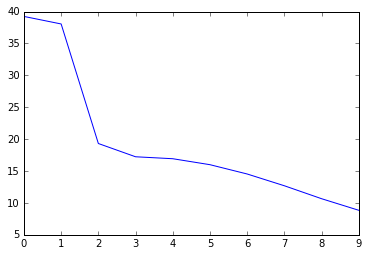

In [11]:
plt.plot(mX[:10])

In [12]:
import A3Part2

mX = A3Part2.optimalZeropad(x, fs, f)

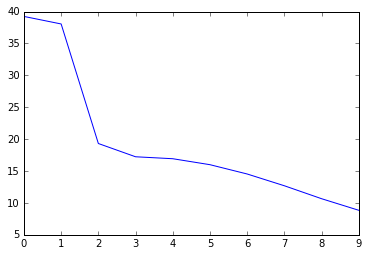